<a href="https://colab.research.google.com/github/Suryarenuka/fmml2021/blob/main/M_Surya_Renuka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        EXAMPLE 1.

1.Try with different languages.

2.The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?.

3.How can we use and visualize trigrams and higher n-grams?


In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=60955660bafa1df37fa30200b34f5b341bc26efdcd0210627945248318612834
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


1.Try with different languages.

2.The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?.

In [ ]:
topic1 = 'Leopard'
topic2 = 'Tom Cruise'
wikipedia.set_lang('lt') 
lt1 = wikipedia.page(topic1).content
lt2 = wikipedia.page(topic2).content
wikipedia.set_lang('it')
it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

when I am using text from other sources other than wikipedia, I am not able to cleanup the data(I read the data using  pandas read function....)


In [ ]:
lt1=cleanup(lt1)
lt2=cleanup(lt2)
it1=cleanup(it1)
it2=cleanup(it2)

In [ ]:
#calculate the frequency of the character n-grams
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

In [ ]:
#compare the histograms of Latin  pages and Italian pages.
unigram_lt1 = Counter(ngrams(lt1,1))
plothistogram(unigram_lt1)
plt.title('Latin 1')
plt.show()
unigram_lt2 = Counter(ngrams(lt2,1))
plothistogram(unigram_lt2)
plt.title('Latin 2')
plt.show()

unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Italian 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Italian 2')
plt.show()

In [ ]:
bigram_lt1 = Counter(ngrams(lt1,2))
plothistogram(bigram_lt1)
plt.title('Latin 1')
plt.show()
bigram_lt2 = Counter(ngrams(lt2,2))
plothistogram(bigram_lt2)
plt.title('Latin 2')
plt.show()

bigram_it1 = Counter(ngrams(it1,2))
plothistogram(bigram_it1)
plt.title('Italian 1')
plt.show()
bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Italian 2')
plt.show()

In [ ]:
trigram_lt1 = Counter(ngrams(lt1,3))
plothistogram(trigram_lt1)
plt.title('Latin 1')
plt.show()
trigram_lt2 = Counter(ngrams(lt2,3))
plothistogram(trigram_lt2)
plt.title('Latin 2')
plt.show()

trigram_it1 = Counter(ngrams(it1,3))
plothistogram(trigram_it1)
plt.title('Italian 1')
plt.show()
trigram_it2 = Counter(ngrams(it2,3))
plothistogram(trigram_it2)
plt.title('Italian 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

In [ ]:
bilt1 = plotbihistogram(bigram_lt1)
plt.show()
bilt2 = plotbihistogram(bigram_lt2)

In [ ]:
biit1 = plotbihistogram(bigram_it1)
plt.show()
biit2 = plotbihistogram(bigram_it2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nLatin 1:')
ShowTopN(bilt1)
print('\nLatin 2:')
ShowTopN(bilt2)
print('\nItalian 1:')
ShowTopN(biit1)
print('\nItalian 2:')
ShowTopN(biit2)

When the text files are of completely differnt topic we can differentiate them based on topic in italian.

If the texts are  of different topic we can also distinguse between topic in same language....

trigrams and n-grams could be visulaized using neural networks.


             EXAMPLE 2

1.Which is the best combination of features?

2.How would you test or visualize four or more features?

3.Can you come up with your own features?

4.Will these features work for different classes other than 0 and 1?

5.What will happen if we take more that two classes at a time?

1.Which is the best combination of features?


I am drawing boundary pixels, hull pixels and sum pixels together... this combination works much better to distinguise between 0 and 1.

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



In [ ]:
no0 = train_X[train_y==0,:,:]
no1 = train_X[train_y==1,:,:]


In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])


In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hull1, hull0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hull', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hull', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

2. How would you test or visualize four or more features?

May be we can use neural networks to visualize. But to exolore this question we need some intuition in  neural networks which we yet to cover........

3. Can you come with your own features?

  4.Will these features work for different classes other than 0 and 1?

In [ ]:
no1= train_X[train_y==4,:,:]
no8= train_X[train_y==5,:,:]

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no8[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum8 = np.sum(no8>0, (1,2))

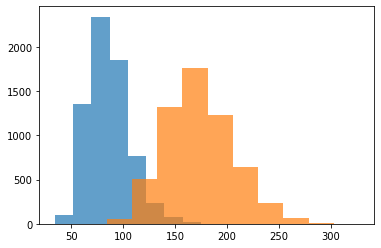

In [ ]:
# histogram for 1 and 8.
plt.hist(sum1, alpha=0.7);
plt.hist(sum8, alpha=0.7);

It distingushes  between 1 and 8. But some part merged. This feature is not workig to distinguise

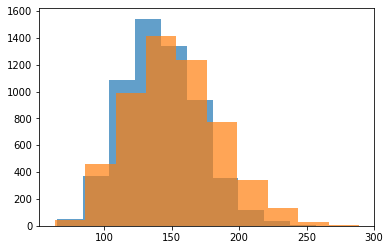

In [ ]:
#histobram for 4 and 5
plt.hist(sum1, alpha=0.7);
plt.hist(sum8, alpha=0.7);

these features does not distingush between numbers. But it works fine for 0 and 1  not for other numbers.


In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




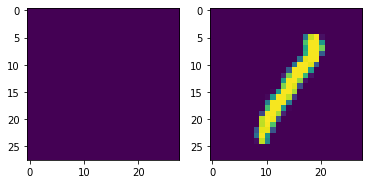

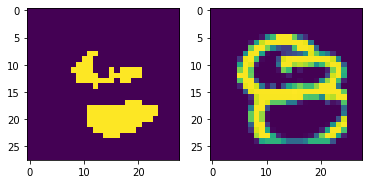

In [ ]:
imgs = [no1[456,:,:],  no8[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

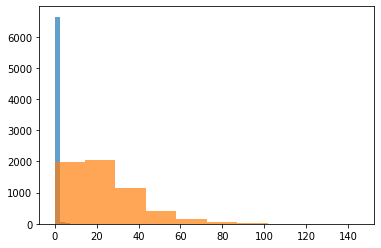

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole8 = np.array([getHolePixels(i).sum() for i in no8])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole8, alpha=0.7);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


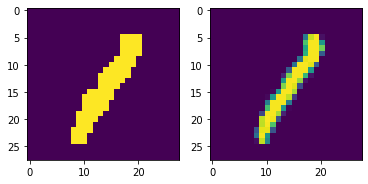

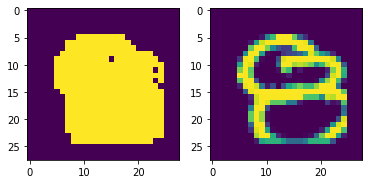

In [ ]:
imgs = [no1[456,:,:],  no8[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

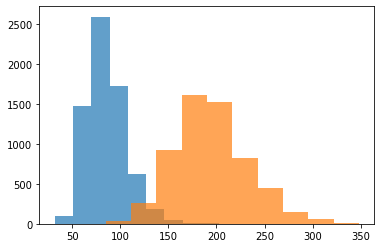

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull8 = np.array([getHullPixels(i).sum() for i in no8])

plt.hist(hull1, alpha=0.7);
plt.hist(hull8, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

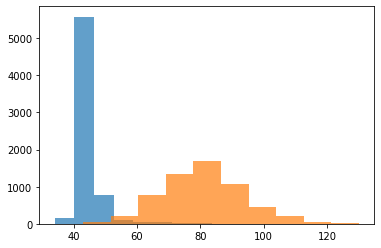

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound8= np.array([getBoundaryPixels(i).sum() for i in no8])

plt.hist(bound1, alpha=0.7);
plt.hist(bound8, alpha=0.7);

5.  What will happen if we take more that two classes at a time?

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]
no2 = train_X[train_y==2,:,:]



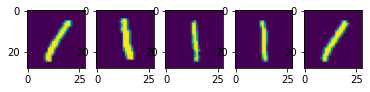

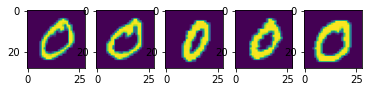

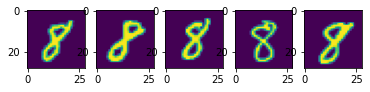

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for kk in range(5):
  plt.subplot(1,5,kk+1)
  plt.imshow(no2[kk,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2))


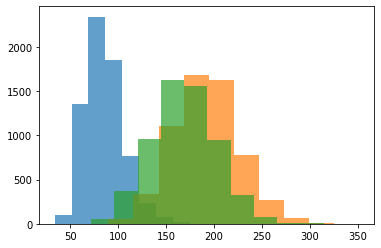

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);

We can take more than two classes at a time. But these features do not work to distinguise numbers.
